# Podstawy budowania modeli ML - Smok Solutions

# 1 Zebranie i obróbka danych

## 1.1 Pobranie danych
Dane pobieramy z strony https://www.kaggle.com/c/titanic/data. Na danych treningowych będziemy budować swój model
natomiast dane testowe posłużą do ewaluacji naszego modelu.

## 1.2 Wczytanie danych do python
Narazie wczytamy tylko zbiór do uczenia modelu. Testowy wczytamy tuż przed predykcją

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [40]:
df = pd.read_csv(r'E:/smok/train.csv')
df_test = pd.read_csv(r'E:/Smok/test.csv')

## 1.3 Wstępne przyjrzenie się danym

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
df.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Renouf, Mr. Peter Henry",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [44]:
df.isnull().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## 1.4 Selekcja kolumn
Tutaj zrobimy najprostszą selekcję, gdzie weźmiemy tylko oczywiste zmienne, na których od razu da się zbudować model, bez wyszukanego data preprocessingu. Wyrzucimy również zmienną z dużą liczbą wartości brakujących - Cabin

In [45]:
df = df.iloc[:, 1:] #Chcemy wszystkie wiersze, ale tylko niektóre kolumny
df_test = df_test.iloc[:, 1:]
df.drop(['Ticket', 'Cabin', 'Name'], inplace=True, axis = 1)
df_test.drop(['Ticket', 'Cabin', 'Name'], inplace=True, axis = 1)

## 1.5 Data preprocessing
Pomimo tego, iż mamy dość jasne kolumny, dalej musimy wykonać kilka czynności, które pozwolą je wszystkie prawidłowo wykorzystać w budowaniu modelu.

In [46]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df_test['Embarked'] = df_test['Embarked'].fillna(df['Embarked'].mode()[0])
df['Age'] = df['Age'].fillna(df['Age'].median())
df_test['Age'] = df_test['Age'].fillna(df['Age'].median())

In [47]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [48]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

Musimy jeszcze wypełnić brakującą wartość w zbiorze testowym w kolumnie fare

In [49]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

In [50]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [51]:
labelE = LabelEncoder()
oneHot = OneHotEncoder()
df_c = pd.concat([df, df_test], axis = 0)
cols = ['Embarked', 'Sex']
for col in cols:
    df_c[col] = labelE.fit_transform(df_c[col])
dummies = pd.get_dummies(df_c['Embarked'], prefix = "Embarked")
df_c = pd.concat([df_c, dummies], axis = 1)
df.drop('Embarked', axis = 1, inplace = True)
df_train = df_c[~df_c['Survived'].isnull()]
df_test = df_c[df_c['Survived'].isnull()]
y = df_train['Survived']
df_train.drop('Survived', axis = 1, inplace = True)
df_test.drop('Survived', axis = 1, inplace = True)

c:\users\olaf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
c:\users\olaf\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
sc = StandardScaler()
X = sc.fit_transform(df_train)
X_pred = sc.transform(df_test)

# 2. Modelowanie danych

## 2.1 Budowanie i ewaluacja modelu
Do modelowania tego zjawiska użyjemy regresji logistycznej, ze względu na łatwą czytelność roziwązań, oraz zrozumienie jej sposobu działania przez każdego.

In [58]:
from sklearn.linear_model import LogisticRegression

In [69]:
lr = LogisticRegression(max_iter = 1000)

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [75]:
param = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
lrCV = GridSearchCV(lr, param, cv = 10, scoring="roc_auc")
lrCV.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [79]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score

In [85]:
y_pred = lrCV.predict(X_test)
y_pred_prob = lrCV.predict_proba(X_test)[:,1]
print("Accuracy score %.2f" %(accuracy_score(y_test,y_pred)))
print("f1 score %.2f" %(f1_score(y_test,y_pred)))
print("roc_auc score %.2f" %(roc_auc_score(y_test,y_pred_prob)))

Accuracy score 0.80
f1 score 0.74
roc_auc score 0.86


Różne wyniki, który najlepszy? 

In [87]:
import matplotlib.pyplot as plt

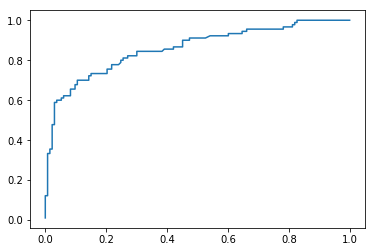

In [94]:
fpr, tpr, _ = roc_curve(y_test,y_pred_prob)
plt.plot(fpr, tpr)
plt.show()

## 2.2 Przygotwanie danych do konkursu

In [98]:
z = lrCV.predict(df_test)
z = pd.DataFrame(z)
z.to_csv("Wynik.csv")